1) What does GAN stand for, and what is its main purpose?

GAN stands for Generative Adversarial Network. Its main purpose is to learn the underlying distribution of a dataset so that it can generate new samples that resemble the original data.

2) Explain the concept of the "discriminator" in GANs.

The discriminator is a neural network that acts as a classifier. Its job is to distinguish between real data samples from the training set and fake data samples generated by the generator.

3) How does a GAN work?

A GAN consists of two neural networks, a generator and a discriminator, that are trained simultaneously in a zero-sum game. The generator tries to create realistic data, while the discriminator tries to identify which data is real and which is fake. Through this adversarial process, both networks improve.

4) What is the generator's role in a GAN?

The generator's role is to take random noise as input and transform it into data samples that resemble the real data distribution. It tries to "fool" the discriminator into thinking its generated samples are real.

5) What is the loss function used in the training of GANs?

The standard GAN uses a minimax loss function. The discriminator tries to maximize its ability to correctly classify real and fake data, while the generator tries to minimize the discriminator's ability to distinguish its generated samples.

6) What is the difference between a WGAN and a traditional GAN?

WGAN (Wasserstein GAN) uses a different loss function based on the Earth Mover's distance (also called Wasserstein distance). This change makes training more stable and less prone to mode collapse.

7) How does the training of the generator differ from that of the discriminator?

The discriminator is trained to maximize its classification accuracy (distinguishing real from fake). The generator is trained to minimize the discriminator's accuracy (making the discriminator believe the generated samples are real).

8) What is a DCGAN, and how is it different from a traditional GAN?

DCGAN (Deep Convolutional GAN) uses convolutional neural networks in both the generator and discriminator. This architecture is particularly effective for image generation.

9) Explain the concept of "controllable generation" in the context of GANs.

Controllable generation refers to the ability to influence the characteristics of the generated samples, for example, by providing additional input to the generator (like class labels or attributes).

10) What is the primary goal of training a GAN?

The primary goal is for the generator to learn the true data distribution so well that its generated samples are indistinguishable from real samples by the discriminator.

11) What are the limitations of GANs?

GANs can be difficult to train, prone to mode collapse (where the generator only produces a limited variety of samples), and can suffer from instability during training.

12) What are StyleGANs, and what makes them unique?

StyleGANs introduce a style-based generator architecture that allows for fine-grained control over different aspects of the generated images, such as hair, facial features, etc.

13) What is the role of noise in a GAN?

Noise (usually random noise like Gaussian or uniform noise) serves as the input to the generator. It provides a source of randomness that the generator transforms into data samples.

14) How does the loss function in a WGAN improve training stability?

The Wasserstein loss provides a smoother gradient compared to the traditional GAN loss, which helps prevent vanishing gradients and mode collapse.

15) Describe the architecture of a typical GAN.

A typical GAN consists of a generator network (often a series of transposed convolutional layers for images) and a discriminator network (often a standard convolutional neural network).

16) What challenges do GANs face during training, and how can they be addressed?

Challenges include mode collapse, training instability, and vanishing gradients. Techniques like WGAN loss, gradient penalties, and different network architectures can help address these.

17) How does DCGAN help improve image generation in GANs?

DCGAN uses convolutional layers, which are well-suited for image data, and employs specific architectural guidelines that improve training stability and image quality.

18) What are the key differences between a traditional GAN and a StyleGAN?

StyleGANs use a style-based generator that allows for control over different levels of image detail, while traditional GANs have a simpler generator architecture.

19) How does the discriminator decide whether an image is real or fake in a GAN?

The discriminator is a classifier that outputs a probability (between 0 and 1) indicating whether an image is real (close to 1) or fake (close to 0).

20) What is the main advantage of using GANs in image generation?

GANs can generate highly realistic and high-resolution images that are often difficult to achieve with other generative models.

21) How can GANs be used in real-world applications?

GANs are used in various applications, including image generation, image editing, image-to-image translation, data augmentation, and drug discovery.

22) What is Mode Collapse in GANs, and how can it be prevented?

Mode collapse occurs when the generator learns to produce only a limited set of samples, failing to capture the full diversity of the data distribution. Techniques like WGAN loss, mini-batch discrimination, and unrolled GANs can help prevent it.

Epoch 1/5, Gen Loss: 0.7606509327888489, Disc Loss: 1.8108322620391846


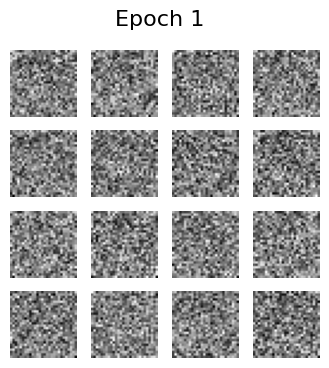

Epoch 2/5, Gen Loss: 0.6517558693885803, Disc Loss: 1.822026014328003


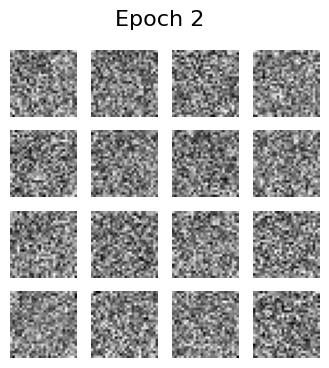

Epoch 3/5, Gen Loss: 0.5465173721313477, Disc Loss: 1.9519567489624023


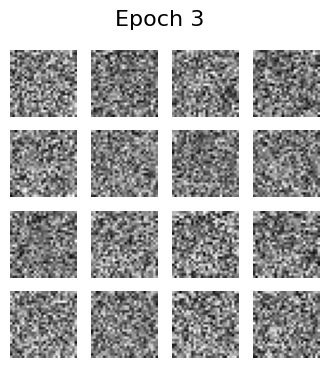

Epoch 4/5, Gen Loss: 0.5595515966415405, Disc Loss: 1.7884676456451416


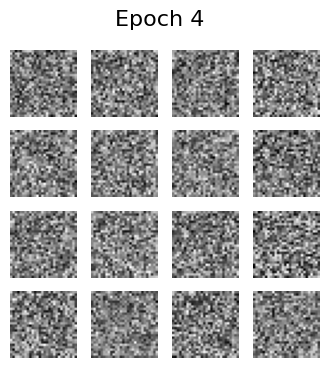

Epoch 5/5, Gen Loss: 0.606587290763855, Disc Loss: 1.6979095935821533


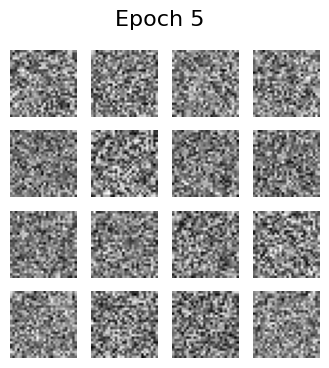

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Constants
LATENT_DIM = 100  # Size of the noise vector
IMG_SHAPE = (28, 28, 1)  # Image dimensions (28x28 grayscale)
BATCH_SIZE = 64
EPOCHS = 5

# Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_dim=LATENT_DIM),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(784, activation='tanh'),
        tf.keras.layers.Reshape(IMG_SHAPE)
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output probability (real/fake)
    ])
    return model

# Loss function and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(generator, discriminator, real_images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = (cross_entropy(tf.ones_like(real_output), real_output) +
                     cross_entropy(tf.zeros_like(fake_output), fake_output))

    # Apply gradients
    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Image generation
def generate_and_plot_images(generator, epoch):
    noise = tf.random.normal([16, LATENT_DIM])  # Generate 16 random images
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')  # Rescale [-1, 1] to [0, 255]
        plt.axis('off')
    plt.suptitle(f"Epoch {epoch}", fontsize=16)
    plt.show()

# Prepare random noise dataset (replace with real data for meaningful results)
def prepare_dummy_data():
    return tf.data.Dataset.from_tensor_slices(tf.random.uniform([1000, *IMG_SHAPE], minval=-1, maxval=1)) \
        .shuffle(1000).batch(BATCH_SIZE)

# Training loop
def train(generator, discriminator, dataset):
    for epoch in range(EPOCHS):
        for batch in dataset:
            gen_loss, disc_loss = train_step(generator, discriminator, batch)

        print(f"Epoch {epoch+1}/{EPOCHS}, Gen Loss: {gen_loss.numpy()}, Disc Loss: {disc_loss.numpy()}")
        generate_and_plot_images(generator, epoch+1)

# Initialize models and dataset
generator = build_generator()
discriminator = build_discriminator()
dummy_dataset = prepare_dummy_data()

# Train the GAN
train(generator, discriminator, dummy_dataset)


In [14]:
import tensorflow as tf

def build_discriminator(input_shape=(28, 28, 1)):
    """
    Builds a discriminator model for a GAN.
    Input: Grayscale image of shape (28, 28, 1)
    Output: Probability of the image being real or fake
    """
    model = tf.keras.Sequential([
        # Convolutional Layer 1
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape),
        tf.keras.layers.LeakyReLU(alpha=0.2),  # Leaky ReLU activation
        tf.keras.layers.Dropout(0.3),         # Prevent overfitting

        # Convolutional Layer 2
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Dropout(0.3),

        # Flatten and Fully Connected Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output: Probability of real (1) or fake (0)
    ])

    return model

# Create the discriminator model
discriminator = build_discriminator()

# Print the model summary for verification
discriminator.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_43 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_44 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1, Gen Loss: 1.0903, Disc Loss: 0.5934


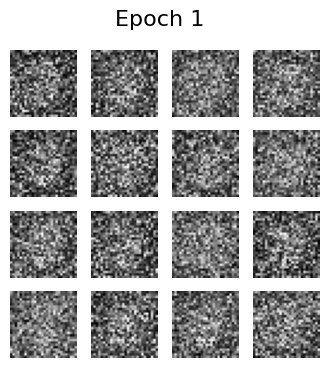

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Constants
LATENT_DIM = 100  # Size of noise vector
IMG_SHAPE = (28, 28, 1)  # Image dimensions
BATCH_SIZE = 64
EPOCHS = 1

# Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_dim=LATENT_DIM),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(784, activation='tanh'),
        tf.keras.layers.Reshape(IMG_SHAPE)
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Real or Fake
    ])
    return model

# Loss functions and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step
@tf.function
def train_step(generator, discriminator, real_images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = (cross_entropy(tf.ones_like(real_output), real_output) +
                     cross_entropy(tf.zeros_like(fake_output), fake_output))

    # Apply gradients
    gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Generate and plot images
def generate_and_plot_images(generator, epoch):
    noise = tf.random.normal([16, LATENT_DIM])  # Generate 16 random images
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')  # Rescale [-1, 1] to [0, 255]
        plt.axis('off')
    plt.suptitle(f"Epoch {epoch}", fontsize=16)
    plt.show()

# Prepare MNIST dataset
def prepare_dataset():
    (x_train, _), _ = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 127.5 - 1.0  # Normalize to [-1, 1]
    x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
    return tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(BATCH_SIZE)

# Training loop
def train(generator, discriminator, dataset):
    for epoch in range(EPOCHS):
        for batch in dataset:
            gen_loss, disc_loss = train_step(generator, discriminator, batch)

        print(f"Epoch {epoch+1}/{EPOCHS}, Gen Loss: {gen_loss.numpy():.4f}, Disc Loss: {disc_loss.numpy():.4f}")
        generate_and_plot_images(generator, epoch+1)

# Initialize models and dataset
generator = build_generator()
discriminator = build_discriminator()
dataset = prepare_dataset()

# Train the GAN
train(generator, discriminator, dataset)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Constants
LATENT_DIM = 100
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 1
CRITIC_ITERATIONS = 5
CLIP_VALUE = 0.01  # For weight clipping

# Generator
def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_dim=LATENT_DIM),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(784, activation='tanh'),
        tf.keras.layers.Reshape(IMG_SHAPE)
    ])
    return model

# Critic (Discriminator in WGAN)
def build_critic():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)  # Outputs unbounded scalar
    ])
    return model

# Loss functions
def critic_loss(real_output, fake_output):
    return tf.reduce_mean(fake_output) - tf.reduce_mean(real_output)  # Minimize negative Wasserstein distance

def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output)  # Minimize negative score from critic

# Optimizers
generator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-5)
critic_optimizer = tf.keras.optimizers.RMSprop(learning_rate=5e-5)

# Training step
@tf.function
def train_step(generator, critic, real_images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    # Train the critic
    for _ in range(CRITIC_ITERATIONS):
        with tf.GradientTape() as critic_tape:
            generated_images = generator(noise, training=True)
            real_output = critic(real_images, training=True)
            fake_output = critic(generated_images, training=True)
            c_loss = critic_loss(real_output, fake_output)

        c_gradients = critic_tape.gradient(c_loss, critic.trainable_variables)
        critic_optimizer.apply_gradients(zip(c_gradients, critic.trainable_variables))

        # Weight clipping for the critic
        for variable in critic.trainable_variables:
            variable.assign(tf.clip_by_value(variable, -CLIP_VALUE, CLIP_VALUE))

    # Train the generator
    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        fake_output = critic(generated_images, training=True)
        g_loss = generator_loss(fake_output)

    g_gradients = gen_tape.gradient(g_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))

    return g_loss, c_loss

# Generate and plot images
def generate_and_plot_images(generator, epoch):
    noise = tf.random.normal([16, LATENT_DIM])  # Generate 16 random images
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')  # Rescale [-1, 1] to [0, 255]
        plt.axis('off')
    plt.suptitle(f"Epoch {epoch}", fontsize=16)
    plt.show()

# Prepare MNIST dataset
def prepare_dataset():
    (x_train, _), _ = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 127.5 - 1.0  # Normalize to [-1, 1]
    x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
    return tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(BATCH_SIZE)

# Training loop
def train(generator, critic, dataset):
    for epoch in range(EPOCHS):
        for batch in dataset:
            g_loss, c_loss = train_step(generator, critic, batch)

        print(f"Epoch {epoch+1}/{EPOCHS}, Gen Loss: {g_loss.numpy():.4f}, Critic Loss: {c_loss.numpy():.4f}")
        generate_and_plot_images(generator, epoch+1)

# Initialize models and dataset
generator = build_generator()
critic = build_critic()
dataset = prepare_dataset()

# Train the WGAN
train(generator, critic, dataset)


In [ ]:
def modify_discriminator_with_dropout(rate=0.4):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(rate),
        tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
    ])
    print(model.summary())
    return model


In [ ]:
def generate_and_plot(generator, num_images, latent_dim):
    noise = tf.random.normal([num_images, latent_dim])
    generated_images = generator(noise, training=False)
    generated_images = (generated_images * 127.5 + 127.5).numpy().astype(np.uint8)

    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i, :, :, 0], cmap='gray')
        ax.axis('off')
    plt.show()


In [ ]:
def stylegan_generator(latent_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8 * 8 * 256, input_dim=latent_dim),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Reshape((8, 8, 256)),

        # Progressive upscaling
        tf.keras.layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding='same'),
        tf.keras.layers.LeakyReLU(),

        tf.keras.layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', activation='tanh')
    ])
    return model
